In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("small_cleaned_data.csv").drop("Unnamed: 0", axis=1)
df.columns

Index(['loantype', 'LoanTenor', 'LoanAmount', 'SectorDescription',
       'EstablishedSinceMonths', 'CurrentAddressSinceMonths', 'DocumentCharge',
       'EMI', 'InterestRate', 'InsuranceRate', 'InsuranceAmount',
       'MariatlStatus', 'MailThrough', 'NoOfDependents', 'Qualification',
       'NetBusinessIncome', 'NetDisposableIncome', 'ProfessionDesc', 'DPD30',
       'Month_and_Year'],
      dtype='object')

In [3]:
df.loantype = df.loantype.astype("object")
df.dtypes[df.dtypes == 'object']

loantype             object
LoanTenor            object
SectorDescription    object
MariatlStatus        object
MailThrough          object
Qualification        object
ProfessionDesc       object
Month_and_Year       object
dtype: object

In [4]:
vars_for_dummies = list(df.dtypes[df.dtypes == 'O'].index)
dummy_vars_df = pd.get_dummies(df[vars_for_dummies])
final_df = pd.concat([df, dummy_vars_df], axis=1, ignore_index=True)
final_df.columns = list(df.columns) + list(dummy_vars_df.columns)
final_df = final_df.drop(vars_for_dummies, axis=1)

In [5]:
sorted(list(final_df.columns))

['CurrentAddressSinceMonths',
 'DPD30',
 'DocumentCharge',
 'EMI',
 'EstablishedSinceMonths',
 'InsuranceAmount',
 'InsuranceRate',
 'InterestRate',
 'LoanAmount',
 'LoanTenor_12 months',
 'LoanTenor_15 months',
 'LoanTenor_18 months',
 'LoanTenor_3 months',
 'LoanTenor_6 months',
 'LoanTenor_9 months',
 'MailThrough_BusinessAddress',
 'MailThrough_HomeAddress',
 'MariatlStatus_Married',
 'MariatlStatus_Single',
 'MariatlStatus_Widow',
 'MariatlStatus_Widow-er',
 'Month_and_Year_2012-01',
 'Month_and_Year_2012-02',
 'Month_and_Year_2012-03',
 'Month_and_Year_2012-04',
 'Month_and_Year_2012-05',
 'Month_and_Year_2012-06',
 'Month_and_Year_2012-07',
 'Month_and_Year_2012-08',
 'Month_and_Year_2012-09',
 'Month_and_Year_2012-10',
 'Month_and_Year_2012-11',
 'Month_and_Year_2012-12',
 'Month_and_Year_2013-01',
 'Month_and_Year_2013-02',
 'Month_and_Year_2013-03',
 'Month_and_Year_2013-04',
 'Month_and_Year_2013-05',
 'Month_and_Year_2013-06',
 'Month_and_Year_2013-07',
 'Month_and_Year_201

In [6]:
final_df.DPD30.value_counts() / len(df)

0    0.892058
1    0.107942
Name: DPD30, dtype: float64

In [7]:
# standrization numeric variables
scaler = StandardScaler()
column_names_to_normalize = list(final_df.drop("DPD30", axis=1).dtypes[(final_df.dtypes == 'int64') |
                                       (final_df.dtypes == 'float64')].index)
x = final_df[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = final_df.index)
final_df[column_names_to_normalize] = df_temp
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('DPD30', axis=1), 
                                                    final_df.DPD30, test_size = 0.25)
print("Train: ", len(X_train))
print("Test: ", len(X_test))

Train:  85344
Test:  28449


In [8]:
final_df.head()

LoanAmount  EstablishedSinceMonths  CurrentAddressSinceMonths  \
0   -0.600118               -1.109784                   1.057811   
1    1.009301               -0.529570                  -0.940925   
2    1.653068                1.597882                   1.057811   
3    1.009301                0.630858                  -1.555920   
4   -0.600118               -1.303189                  -1.248423   

   DocumentCharge       EMI  InterestRate  InsuranceRate  InsuranceAmount  \
0       -0.572570 -0.573996      1.035661       0.508711         0.220318   
1        1.711225  1.128204     -0.335692       0.508711         1.311002   
2        1.711225  1.170354     -0.335692       0.508711         2.603432   
3        1.711225  1.128204     -0.335692       0.886167         1.219587   
4       -0.572570 -0.573996      1.035661       0.508711         0.218742   

   NoOfDependents  NetBusinessIncome  ...  Month_and_Year_2018-02  \
0        0.174671           0.204758  ...                       0   
1       -1.328187           1.235837  ...                       0   
2       -0.827235           1.176609  ...                       0   
3       -1.328187          -0.550782  ...                       0   
4       -0.326282           0.178492  ...                       0   

   Month_and_Year_2018-03  Month_and_Year_2018-04  Month_and_Year_2018-05  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Month_and_Year_2018-06  Month_and_Year_2018-07  Month_and_Year_2018-08  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Month_and_Year_2018-09  Month_and_Year_2018-10  Month_and_Year_2018-11  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 124 columns]

In [290]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=80)
rnd_clf.fit(X_train, y_train)

names = []
importanc = []
for name, importance in zip(X_train.columns, rnd_clf.feature_importances_):
    if importance > 0.01:
        names.append(name)
        importanc.append(importance)

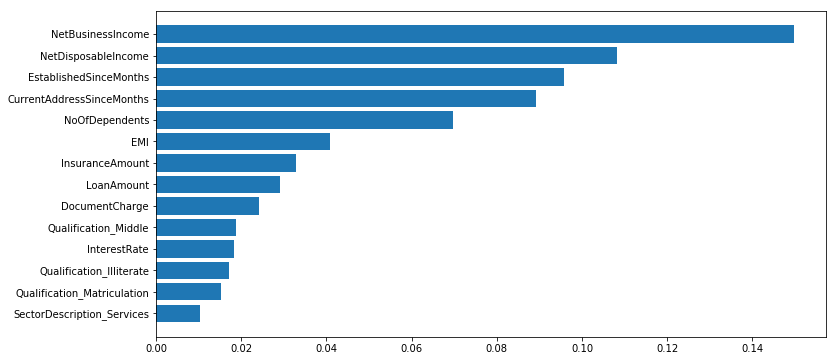

In [291]:
df = pd.DataFrame()
for i in ['names', 'importanc']:
    df[i] = eval(i)
df = df.sort_values('importanc')
plt.figure(figsize=(12,6))
plt.barh(df.names, df.importanc)
plt.show()

In [ ]:
tn = []
fp = []
fn = []
tp = []
one_proportion = []
zero_proportion = []
acuracy = []
one_weight = []
zero_weight = []
def rendomforest(i, z):
    X_train, X_test, y_train, y_test = train_test_split(final_df.drop('DPD30', axis=1), 
                                                    final_df.DPD30, test_size = 0.25)
    clf=RandomForestClassifier(n_estimators=100, n_jobs=200, class_weight = {1:i,0:z})
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    cm = confusion_matrix(y_test, predicted).ravel()
    TN, FP, FN, TP = cm / sum(cm)
    tn.append(TN); fp.append(FP); fn.append(FN); tp.append(TP) 
    acuracy.append(round(np.mean(predicted == y_test), 2))
    one_proportion.append(np.mean(y_test == 1))
    zero_proportion.append(np.mean(y_test == 0))

In [ ]:
for i in range(1, 41):
    for z in np.linspace(0.001, 20, num=10):
        one_weight.append(i)
        zero_weight.append(z)
        rendomforest(i, z)
p = pd.DataFrame()
for i in ['tn', 'fp', 'fn', 'tp', 'acuracy', 'one_weight', 'zero_weight',
          'one_proportion','zero_proportion']:
    p[i] = eval(i)
p['Precision'] = p.tp/(p.tp+p.fp)
p['Recall'] = p.tp / (p.tp + p.fn)
# p.to_csv("statistics_randomForest_on_small_cleaned_data4.csv")

/home/amir/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


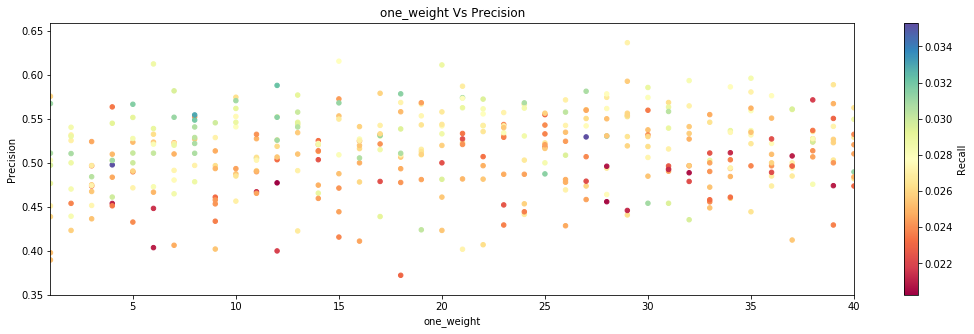

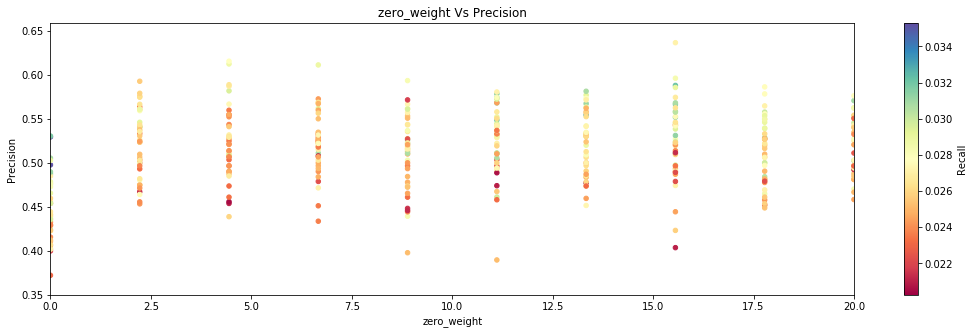

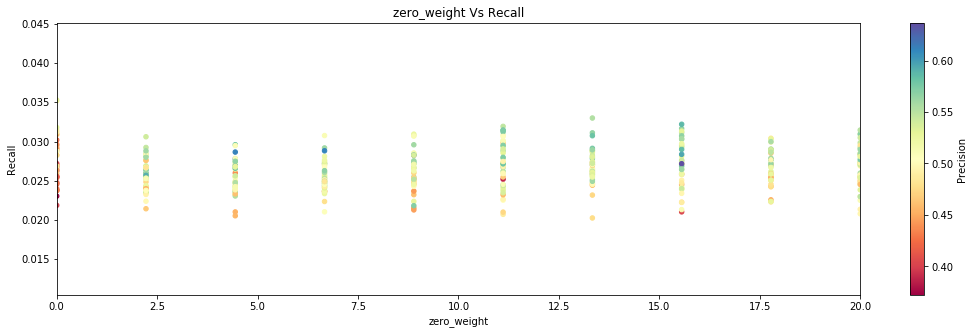

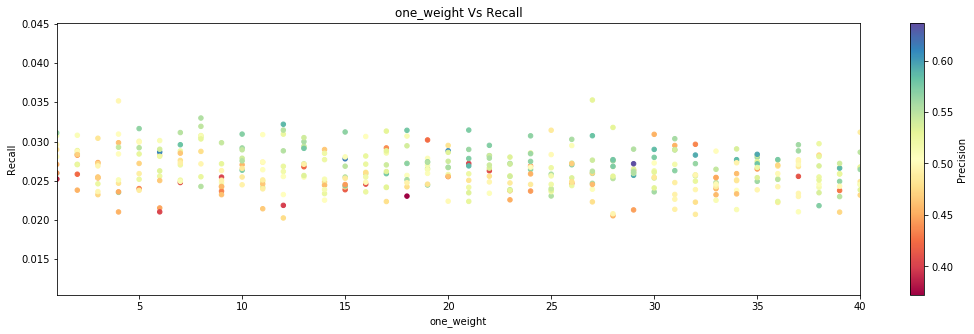

In [281]:
cmap = cm.get_cmap('Spectral')
for i in [('one_weight', 'Precision'), ('zero_weight', 'Precision'), 
          ('zero_weight', 'Recall'), ('one_weight', 'Recall')]:
    fig = plt.figure()
    plt.title(i[0] + " Vs " + i[1])
    plt.ylabel(i[1])
    ax = plt.subplot(111)
    p.plot(i[0], i[1], c = 'Precision' if (i[1]=='Recall') else 'Recall', 
                   figsize=(18, 5), cmap=cmap, ax=ax, kind='scatter')
    ax.set_xlim(p[[i[0]]].min()[i[0]], p[[i[0]]].max()[i[0]])

In [6]:
p.sort_values("Precision", ascending=False)

tn        fp        fn        tp  acuracy  one_weight  zero_weight  \
287  0.889662  0.001687  0.105698  0.002953     0.89          29    15.555778   
142  0.886815  0.001933  0.108158  0.003093     0.89          15     4.445222   
52   0.887623  0.002004  0.107209  0.003164     0.89           6     4.445222   
193  0.890717  0.001968  0.104222  0.003093     0.89          20     6.667333   
347  0.886358  0.002144  0.108334  0.003164     0.89          35    15.555778   
314  0.887237  0.002144  0.107491  0.003128     0.89          32     8.889444   
281  0.888643  0.001933  0.106612  0.002812     0.89          29     2.223111   
382  0.888362  0.002039  0.106682  0.002918     0.89          39     4.445222   
117  0.891736  0.002390  0.102464  0.003410     0.90          12    15.555778   
202  0.892158  0.002004  0.102991  0.002847     0.90          21     4.445222   
338  0.890014  0.002109  0.104889  0.002988     0.89          34    17.777889   
297  0.889908  0.002214  0.104749  0.003128     0.89          30    15.555778   
62   0.892052  0.002250  0.102570  0.003128     0.90           7     4.445222   
266  0.891314  0.002355  0.103062  0.003269     0.89          27    13.333667   
345  0.890471  0.002109  0.104503  0.002918     0.89          35    11.111556   
161  0.893564  0.001968  0.101761  0.002707     0.90          17     2.223111   
175  0.890189  0.002461  0.103976  0.003374     0.89          18    11.111556   
278  0.889943  0.002179  0.104889  0.002988     0.89          28    17.777889   
126  0.889100  0.002320  0.105417  0.003164     0.89          13    13.333667   
359  0.887342  0.002250  0.107350  0.003058     0.89          36    20.000000   
1    0.889592  0.002074  0.105522  0.002812     0.89           1     2.223111   
91   0.889838  0.002109  0.105206  0.002847     0.89          10     2.223111   
277  0.886463  0.002214  0.108334  0.002988     0.89          28    15.555778   
295  0.885901  0.002320  0.108651  0.003128     0.89          30    11.111556   
205  0.889100  0.002531  0.104960  0.003410     0.89          21    11.111556   
206  0.889170  0.002250  0.105557  0.003023     0.89          21    13.333667   
143  0.889908  0.001968  0.105487  0.002636     0.89          15     6.667333   
215  0.889240  0.002390  0.105171  0.003199     0.89          22    11.111556   
256  0.888608  0.002214  0.106225  0.002953     0.89          26    13.333667   
374  0.888713  0.001793  0.107104  0.002390     0.89          38     8.889444   
..        ...       ...       ...       ...      ...         ...          ...   
147  0.887729  0.003339  0.106260  0.002671     0.89          15    15.555778   
234  0.890014  0.003164  0.104292  0.002531     0.89          24     8.889444   
230  0.887799  0.003691  0.105592  0.002918     0.89          24     0.001000   
280  0.886956  0.003656  0.106506  0.002882     0.89          29     0.001000   
14   0.887905  0.003902  0.105136  0.003058     0.89           2     8.889444   
160  0.887588  0.004042  0.105206  0.003164     0.89          17     0.001000   
2    0.889662  0.003550  0.104011  0.002777     0.89           1     4.445222   
20   0.886991  0.003585  0.106647  0.002777     0.89           3     0.001000   
310  0.887975  0.004148  0.104679  0.003199     0.89          32     0.001000   
83   0.889838  0.003304  0.104327  0.002531     0.89           9     6.667333   
40   0.888256  0.003410  0.105733  0.002601     0.89           5     0.001000   
220  0.888537  0.003410  0.105487  0.002566     0.89          23     0.001000   
380  0.888608  0.003410  0.105417  0.002566     0.89          39     0.001000   
250  0.889627  0.003515  0.104222  0.002636     0.89          26     0.001000   
180  0.888537  0.004394  0.103835  0.003234     0.89          19     0.001000   
190  0.886077  0.003831  0.107280  0.002812     0.89          20     0.001000   
17   0.887342  0.003831  0.106014  0.002812     0.89           2    15.555778   
120  0.888467  0.003937  0.104714  0.00288